# Model the Problem

## Preprocessing the data

In [17]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('data_tau_ta.csv')

In [3]:
df.head()

,title,date,days,tokens,stem,lemma,pos_tags,named_entities
0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1,"['10', 'years', 'open', 'source', 'machine', '...",10 Years of Open Source Machine Learn,10 Years of Open Source Machine Learning,"[('10', 'CD'), ('Years', 'NNS'), ('of', 'IN'),...",['Open Source Machine']
1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1,"['machines', 'learn', 'apple', 'watch', 'detec...",What machines can learn from Apple Watch: dete...,What machines can learn from Apple Watch: dete...,"[('What', 'WP'), ('machines', 'NNS'), ('can', ...",['Apple Watch']
2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1,"['deep', 'roots', 'javascript', 'fatigue']",The Deep Roots of Javascript Fatigu,The Deep Roots of Javascript Fatigue,"[('The', 'DT'), ('Deep', 'NNP'), ('Roots', 'NN...","['Deep Roots', 'Javascript Fatigue']"
3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1,"['data', 'science', 'intro', 'math', 'phys', '...",Data science intro for math/phys background,Data science intro for math/phys background,"[('Data', 'NNP'), ('science', 'NN'), ('intro',...",['Data']
4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1,"['data', 'science', 'pop', 'austin', 'tx']","Data Science Pop-Up in Austin, TX","Data Science Pop-Up in Austin, TX","[('Data', 'NNP'), ('Science', 'NNP'), ('Pop', ...","['Data Science Pop', 'Austin']"


In [4]:
df.shape

(180, 8)

In [5]:
import nltk

In [6]:
from nltk.corpus import stopwords

In [7]:
stop = stopwords.words('english')

In [8]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [27]:
tokens_list = df['tokens'].tolist()

In [28]:
tokens_list

["['10', 'years', 'open', 'source', 'machine', 'learning']",
 "['machines', 'learn', 'apple', 'watch', 'detecting', 'undiagnosed', 'heart', 'condition']",
 "['deep', 'roots', 'javascript', 'fatigue']",
 "['data', 'science', 'intro', 'math', 'phys', 'background']",
 "['data', 'science', 'pop', 'austin', 'tx']",
 "['data', 'science', 'tools', 'biggest', 'winners', 'losers']",
 "['analyzing', 'golden', 'state', 'warriors', 'passing', 'network', 'using', 'graphframes', 'spark']",
 "['making', 'transparent', 'variations', 'analytical', 'choices', 'affect', 'results']",
 "['neural', 'networks', 'demystified']",
 "['conversion', 'rate', 'changed', 'bayesian', 'timeseries', 'analysis', 'python']",
 "['descriptive', 'statistics', 'sql']",
 "['xgboost4j', 'portable', 'distributed', 'xgboost', 'spark', 'flink', 'dataflow']",
 "['introduction', 'scikit', 'flow', 'simplified', 'interface', 'tensorflow']",
 "['personality', 'space', 'cartoon', 'characters']",
 "['machine', 'learning', 'depth', 'non'

In [38]:
# Let us get the frequency count
frequency_words = {}
for data in tokens_list:
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace("'","")
    data_list = data.split(',')
    print(data_list)
    for token in data_list:
        token = token.rstrip()
        token = token.lstrip()
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1

['10', ' years', ' open', ' source', ' machine', ' learning']
['machines', ' learn', ' apple', ' watch', ' detecting', ' undiagnosed', ' heart', ' condition']
['deep', ' roots', ' javascript', ' fatigue']
['data', ' science', ' intro', ' math', ' phys', ' background']
['data', ' science', ' pop', ' austin', ' tx']
['data', ' science', ' tools', ' biggest', ' winners', ' losers']
['analyzing', ' golden', ' state', ' warriors', ' passing', ' network', ' using', ' graphframes', ' spark']
['making', ' transparent', ' variations', ' analytical', ' choices', ' affect', ' results']
['neural', ' networks', ' demystified']
['conversion', ' rate', ' changed', ' bayesian', ' timeseries', ' analysis', ' python']
['descriptive', ' statistics', ' sql']
['xgboost4j', ' portable', ' distributed', ' xgboost', ' spark', ' flink', ' dataflow']
['introduction', ' scikit', ' flow', ' simplified', ' interface', ' tensorflow']
['personality', ' space', ' cartoon', ' characters']
['machine', ' learning', ' de

In [42]:
frequency_words['data']

42

## Term Frequency and Inverse Document Frequency

tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1]:8 It is often used as a weighting factor in information retrieval and text mining. The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

Let us start with the **"Term Frequency" - TF**

In [43]:
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [44]:
df_tfidf.head()

,word,tf
0,neighbors,1
1,,1
2,code,4
3,similarity,1
4,dezyre,1


In [45]:
df_tfidf.sort_values(ascending=False, by = "tf", inplace=True)

In [46]:
df_tfidf.head()

,word,tf
157,data,42
414,learning,28
125,science,21
183,machine,16
608,deep,11


Let us get in how many documents (each title) does the word occur

In [58]:
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        document = document.split(',')
        document = map(str.strip,document)
        if word in document:
            document_counter = document_counter + 1
        
    return document_counter

In [59]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [60]:
df_tfidf.head()

,word,tf,document_count
157,data,42,40
414,learning,28,28
125,science,21,21
183,machine,16,16
608,deep,11,11


In [61]:
df_tfidf.tail()

,word,tf,document_count
233,evaluation,1,1
232,millions,1,1
231,newly,1,1
230,turing,1,1
645,debate,1,1


In [62]:
# we already have the count of all the documents
total_docs = df.shape[0]

In [63]:
total_docs

180

** let us compute the tfidf ** 

**tfidf = tf . idf**

**idf = log(total_docs/number of documents that contain the word)**

In [64]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [66]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [67]:
df_tfidf.head()

,word,tf,document_count,tfidf
157,data,42,40,25.286520
414,learning,28,28,21.788235
125,science,21,21,18.964890
183,machine,16,16,16.662283
608,deep,11,11,13.245320


In [68]:
df_tfidf.tail()

,word,tf,document_count,tfidf
233,evaluation,1,1,2.255273
232,millions,1,1,2.255273
231,newly,1,1,2.255273
230,turing,1,1,2.255273
645,debate,1,1,2.255273


In [69]:
df_tfidf.sort(columns='tfidf',ascending=True,inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [70]:
df_tfidf.head()

,word,tf,document_count,tfidf
493,shape,1,1,2.255273
150,??,1,1,2.255273
149,ensemble,1,1,2.255273
148,instead,1,1,2.255273
147,significance,1,1,2.255273


In [71]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [78]:
df_tfidf.tail()

,tf,document_count,tfidf
word,,,
analysis,11,11,13.245320
machine,16,16,16.662283
science,21,21,18.964890
learning,28,28,21.788235
data,42,40,25.286520


In [73]:
df_tfidf.set_index('word', inplace=True)

In [74]:
df_tfidf.head()

,tf,document_count,tfidf
word,,,
shape,1,1,2.255273
??,1,1,2.255273
ensemble,1,1,2.255273
instead,1,1,2.255273
significance,1,1,2.255273


** now let us plot a word cloud to see the prominence of the word **

In [75]:
wordcloud = WordCloud()

In [76]:
word_tfidf = df_tfidf['tfidf'].to_dict()

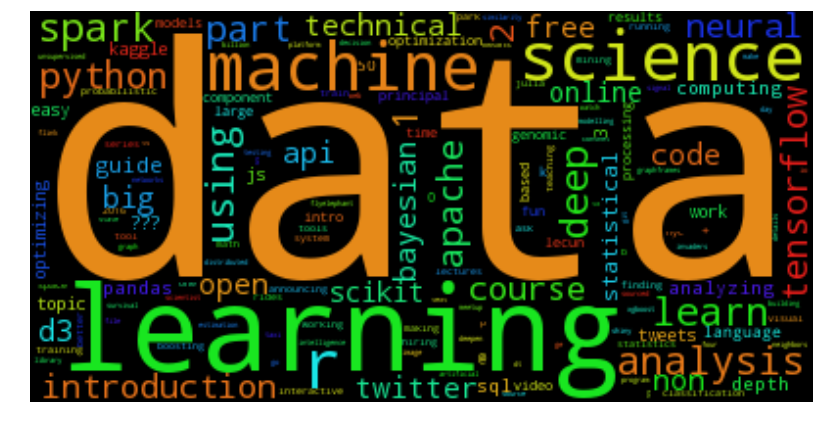

In [77]:
wordcloud.generate_from_frequencies(word_tfidf.items())
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Topic modelling


In [ ]:
import lda
import numpy as np
import lda.datasets
import sklearn.feature_extraction.text as text

** we are using the pre built reuters data set **

Generating the document term matrix

In [ ]:
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=1)

In [ ]:
dtm = vectorizer.fit_transform(df.title).toarray()

In [ ]:
dtm

Loading the vocabulary

In [ ]:
vocab = np.array(vectorizer.get_feature_names())

In [ ]:
vocab

In [ ]:
titles = df.title


In [ ]:
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)

In [ ]:
model.fit(dtm)

In [ ]:
model.topic_word_

In [ ]:
topic_word = model.topic_word_ 

In [ ]:
topic_word

In [ ]:
n_top_words = 8

In [ ]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

In [ ]:
doc_topic = model.doc_topic_

In [ ]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("topic: {} , {}".format(topic_most_pr,titles[n]))

# Sentiment Analysis


In [ ]:
from nltk.classify import NaiveBayesClassifier
import math
import collections

In [ ]:
pos_features = []
neg_features = []

In [ ]:
def make_full_dict(word):
    return dict([(word, True)])

In [ ]:
with open('postive_words.txt','r') as posFile:
    lines = posFile.readlines()
    for line in lines:
        pos_features.append([make_full_dict(line.rstrip()),'pos'])
        

In [ ]:
pos_features

In [ ]:
with open('negative_words.txt','r',encoding='utf-8') as negFile:
    lines = negFile.readlines()
    for line in lines:
        neg_features.append([make_full_dict(line.rstrip()),'neg'])

In [ ]:
neg_features

In [ ]:
len(pos_features),len(neg_features)

In [ ]:
trainFeatures = pos_features + neg_features

In [ ]:
trainFeatures

In [ ]:
classifier = NaiveBayesClassifier.train(trainFeatures)

In [ ]:
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)

In [ ]:
def make_full_dict_sent(words):
    return dict([(word, True) for word in words])

In [ ]:
import re

In [ ]:
neg_test = 'I hate data science'

In [ ]:
title_words = re.findall(r"[\w']+|[.,!?;]", 'I have a love and hate relationship with data science')

In [ ]:
title_words

In [ ]:
test=[]

In [ ]:
test.append([make_full_dict_sent(title_words),''])

In [ ]:
test

In [ ]:
for i, (features, label) in enumerate(test):
    predicted = classifier.classify(features)
    print(predicted)

In [ ]:
for doc in df.title:
    title_words = re.findall(r"[\w']+|[.,!?;]", doc)
    test = []
    test.append([make_full_dict_sent(title_words),''])
    for i, (features, label) in enumerate(test):
        predicted = classifier.classify(features)
        print(predicted,doc)
    